# Lecture 7

## Mean/Variance

Also for lab 3, remember the equations for mean/variance. If you have a data sample ${x_1, x_2, ..., x_N}$ the mean is:

$$ 
\bar{x} = \frac{1}{N}\sum_{i=1}^{N} x_i
$$

and the variance is:

$$
<x^2> = \frac{1}{N-1} \sum_{i=1}^{N} (x_i - \bar{x})^2
$$

## Random Number Generator

We have learned about probability distributions and how data is generally a collection of random variables drawn from probability distributions. 

We also have discussed that analysis of a dataset is often really just trying to characterize the probability distributions of the random variables. Once we understand those probability distributions, we can then make predictions about future data.

But we can also create (e.g. simulate) new data from the probability distributions. 

So how do we get a computer to generate data (e.g. random variables) from probability distributions? First, think about generating random numbers in a computer.

In [1]:
# Setup to make historgrams later...
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def uniform_generator(seed=123124.):
    a=1111111
    b=2222222
    m=6700417 # This is a large prime number
    x=seed
    
    def random():
        nonlocal x
        x=(a*x+b)%m
        return x/m  # divide by m to set range to 0->1
    
    return random

Quick side note: The use of `nonlocal`. In python, functions have their own local scope where references to variables created in the function are kept with the instance of the call to the function. The function has access to the scope from which it was defined as well as the global scope. When searching for a variable, python looks in the local scope first and works itself to the global scope. However, variable assignment causes a new variable within this local scope. Therefore in the in the case above, the assignment `x=(a*x+b)%m` will supercede `x=seed`. `nonlocal` tells python to use the variable in the previous scope.

In [4]:
my_uniform=uniform_generator()

In [5]:
random_numbers=list()
for _ in range(10):
    random_numbers.append(my_uniform())

In [6]:
random_numbers

[0.6326616686692783,
 0.6709910741376246,
 0.8950304137787245,
 0.46973837598465884,
 0.8083329739029675,
 0.9906205837636672,
 0.7591005156843224,
 0.26473680667934546,
 0.30966057784164774,
 0.6059604946975689]

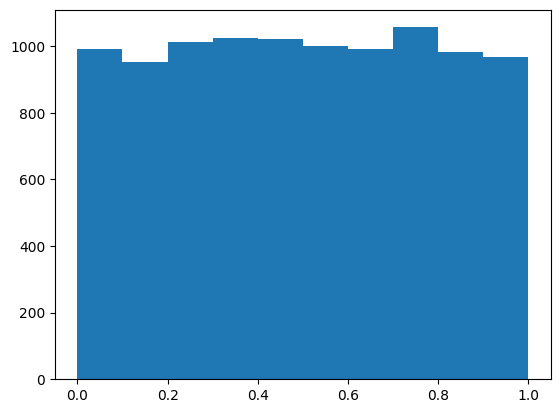

In [7]:
random_numbers=list()
for _ in range(10000):
    random_numbers.append(my_uniform())
_=plt.hist(random_numbers,bins=10)

## Exponential Generator

In [8]:
import math

def generate_exp(tau,seed=32144):
    my_uniform=uniform_generator(seed)
    
    def generator():
        nonlocal my_uniform
        nonlocal tau
        u = my_uniform()
        return -tau*(math.log(1.-u))
    
    return generator

In [9]:
my_exp_generator= generate_exp(10.)

In [10]:
my_exp_generator()

11.372504436305544

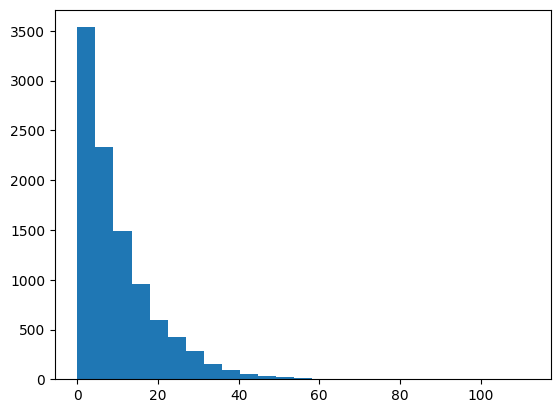

In [11]:
random_numbers=list()
for _ in range(10000):
    random_numbers.append(my_exp_generator())
_=plt.hist(random_numbers,bins=25)

## Scaling/Shifting

Reminder about lab 3: unless explicitly specified, don't use numpy. 

In the beginning of Lab 3 you are asked to take random numbers between 0 and 1 and scale and shift them to be between $x_{min}$ and $x_{max}$. The formula is pretty basic. If $x_0$ is between 0 and 1 then $x$ computed as:
$$
x= (x_{max}-x_{min}) x_0 + x_{min}
$$
will be between $x_{min}$ and $x_{max}$. 

In your solution, you'll most likely generate $x_0$ one by one, compute $x$, and store $x$ into a list to be returned from your function.


## Min, Max, ArgMin, ArgMax

Consider a list of random numbers:

In [12]:
import random
data = [random.random() for _ in range(100)]

In [13]:
data

[0.816450303423466,
 0.3489932195659473,
 0.010192188601093388,
 0.7751569310126154,
 0.845365608026716,
 0.2670179317923165,
 0.46636300633178085,
 0.7382371838853242,
 0.8742851425186137,
 0.48227573756670505,
 0.2904456867758629,
 0.460978518245324,
 0.8246513229862384,
 0.7173700355501338,
 0.8523177437403262,
 0.2445061922552335,
 0.25554417346546177,
 0.2941704405393617,
 0.992885583694557,
 0.6786577931709457,
 0.9175399075409951,
 0.8211087682649341,
 0.8503281130536889,
 0.9819870308651576,
 0.7407137040183395,
 0.15139867418911235,
 0.8778467564188026,
 0.9040860859586443,
 0.9660008959406015,
 0.680746802950155,
 0.5750632762683654,
 0.3595388310020263,
 0.9561233012523839,
 0.651412330458667,
 0.7745276922142873,
 0.4710761876219266,
 0.8001934915057856,
 0.42820300129568634,
 0.7619125103856929,
 0.4239026518094281,
 0.47819408793478524,
 0.7471575871794519,
 0.2772695103294863,
 0.805863943575672,
 0.38668100023297214,
 0.8740670960155178,
 0.7363486148271069,
 0.28729446

You find the largest and smallest numbers in the list:

In [14]:
max(data),min(data)

(0.992885583694557, 0.003992589919307288)

It is convenient that `max` and `min` are available in python, but let's think about how we would implement one of these functions:

In [15]:
def find_max(d):
    a_max=d[0]
    for e in d:
        if e>a_max:
            a_max=e
    return a_max

In [16]:
find_max(data)

0.992885583694557

While `max` gives us the largest value, we may instead be interested to know which element in the list is the largest (i.e. what is the index of the largest value)... this is where `argmax` comes in:

In [17]:
def argmax_1(d):
    a_max = d[0]
    i_max = 0
    for i in range(len(d)):
        if d[i] > a_max:
            a_max = d[i]
            i_max = i
    return i_max, a_max


print(argmax_1(data))
            

(18, 0.992885583694557)


In [18]:
def find_argmax(d):
    a_max=d[0]
    i_max=0
    for i,e in enumerate(d):
        if e > a_max:
            a_max=e
            i_max=i
    return i_max

In [19]:
find_argmax(data)

18

## Numerical Manipulation of Mathematical Functions 

Recall that we can easily make a list of sequential intergers using `range`.

In [20]:
list(range(5,20,3))

[5, 8, 11, 14, 17]

What if we wanted to do something similar but with non-intergers, for example in step size of 1/2:

In [21]:
list(range(5.,20.,.5))

TypeError: 'float' object cannot be interpreted as an integer

Let's implement what we need:

In [22]:
def arange(x_min,x_max,step_size=1.):
    if step_size >= 0 and x_max<x_min:
        return list()
    
    if step_size < 0 and x_max>x_min:
        return list()
    
    x=x_min
    out = list()
    while x<x_max:
        out.append(x)
        x+=step_size
    return out

In [23]:
arange(5.,20.,.5)

[5.0,
 5.5,
 6.0,
 6.5,
 7.0,
 7.5,
 8.0,
 8.5,
 9.0,
 9.5,
 10.0,
 10.5,
 11.0,
 11.5,
 12.0,
 12.5,
 13.0,
 13.5,
 14.0,
 14.5,
 15.0,
 15.5,
 16.0,
 16.5,
 17.0,
 17.5,
 18.0,
 18.5,
 19.0,
 19.5]

An alternative similar function is:

In [24]:
def linspace(x_min,x_max,steps=10):
    step_size=(x_max-x_min)/steps
    x=x_min
    out = list()
    for i in range(steps):
        out.append(x)
        x+=step_size
    return out

In [25]:
linspace(5.,20.,10)

[5.0, 6.5, 8.0, 9.5, 11.0, 12.5, 14.0, 15.5, 17.0, 18.5]

In [26]:
linspace(5.,0.,10)

[5.0, 4.5, 4.0, 3.5, 3.0, 2.5, 2.0, 1.5, 1.0, 0.5]

Now lets use what we wrote to investigate a mathematical function:

In [27]:
def a_function(x):
    return (1+x)**2

In [28]:
x_vals = arange(-5.,5.,0.1)
print(x_vals)

[-5.0, -4.9, -4.800000000000001, -4.700000000000001, -4.600000000000001, -4.500000000000002, -4.400000000000002, -4.3000000000000025, -4.200000000000003, -4.100000000000003, -4.0000000000000036, -3.9000000000000035, -3.8000000000000034, -3.7000000000000033, -3.600000000000003, -3.500000000000003, -3.400000000000003, -3.300000000000003, -3.200000000000003, -3.1000000000000028, -3.0000000000000027, -2.9000000000000026, -2.8000000000000025, -2.7000000000000024, -2.6000000000000023, -2.500000000000002, -2.400000000000002, -2.300000000000002, -2.200000000000002, -2.100000000000002, -2.0000000000000018, -1.9000000000000017, -1.8000000000000016, -1.7000000000000015, -1.6000000000000014, -1.5000000000000013, -1.4000000000000012, -1.3000000000000012, -1.200000000000001, -1.100000000000001, -1.0000000000000009, -0.9000000000000009, -0.8000000000000009, -0.700000000000001, -0.600000000000001, -0.500000000000001, -0.400000000000001, -0.30000000000000104, -0.20000000000000104, -0.10000000000000103,

3 ways to do the same thing:

In [31]:
y_vals = list()
for x in x_vals:
    y_vals.append(a_function(x))

In [29]:
y_vals = [a_function(x) for x in x_vals]

In [30]:
y_vals = list(map(a_function,x_vals))
print(y_vals)

[16.0, 15.210000000000003, 14.440000000000005, 13.690000000000008, 12.96000000000001, 12.250000000000012, 11.560000000000015, 10.890000000000017, 10.240000000000018, 9.610000000000019, 9.000000000000021, 8.41000000000002, 7.8400000000000185, 7.290000000000018, 6.760000000000017, 6.250000000000015, 5.760000000000015, 5.290000000000013, 4.840000000000012, 4.410000000000012, 4.000000000000011, 3.6100000000000096, 3.240000000000009, 2.890000000000008, 2.5600000000000076, 2.2500000000000067, 1.960000000000006, 1.6900000000000053, 1.4400000000000046, 1.2100000000000042, 1.0000000000000036, 0.810000000000003, 0.6400000000000026, 0.4900000000000021, 0.3600000000000017, 0.25000000000000133, 0.160000000000001, 0.09000000000000069, 0.040000000000000424, 0.010000000000000196, 7.888609052210118e-31, 0.009999999999999818, 0.039999999999999626, 0.08999999999999943, 0.15999999999999923, 0.249999999999999, 0.35999999999999877, 0.48999999999999855, 0.6399999999999983, 0.8099999999999983, 0.9999999999999

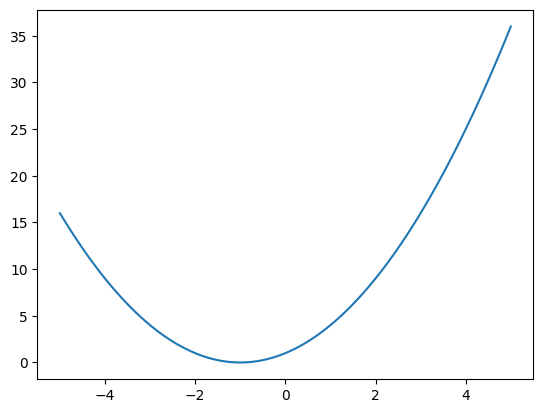

In [32]:
plt.plot(x_vals,y_vals)

In [33]:
list(zip(x_vals,y_vals))

[(-5.0, 16.0),
 (-4.9, 15.210000000000003),
 (-4.800000000000001, 14.440000000000005),
 (-4.700000000000001, 13.690000000000008),
 (-4.600000000000001, 12.96000000000001),
 (-4.500000000000002, 12.250000000000012),
 (-4.400000000000002, 11.560000000000015),
 (-4.3000000000000025, 10.890000000000017),
 (-4.200000000000003, 10.240000000000018),
 (-4.100000000000003, 9.610000000000019),
 (-4.0000000000000036, 9.000000000000021),
 (-3.9000000000000035, 8.41000000000002),
 (-3.8000000000000034, 7.8400000000000185),
 (-3.7000000000000033, 7.290000000000018),
 (-3.600000000000003, 6.760000000000017),
 (-3.500000000000003, 6.250000000000015),
 (-3.400000000000003, 5.760000000000015),
 (-3.300000000000003, 5.290000000000013),
 (-3.200000000000003, 4.840000000000012),
 (-3.1000000000000028, 4.410000000000012),
 (-3.0000000000000027, 4.000000000000011),
 (-2.9000000000000026, 3.6100000000000096),
 (-2.8000000000000025, 3.240000000000009),
 (-2.7000000000000024, 2.890000000000008),
 (-2.6000000000

How about a python function that finds the minumum of a mathematical function:

In [34]:
def a_function(x):
    return (1+x)**2

def find_min_0(f,x_min,x_max,steps=10):
    
    step_size=(x_max-x_min)/steps
    x=x_min
    y_min=f(x_min)
    x_min_val=x_min

    for i in range(steps):
        y=f(x)
        if y<y_min:
            x_min_val=x
            y_min=y
        x+=step_size
    
    return x_min_val

In [35]:
find_min_0(a_function,-10,10,100)

-1.000000000000002

## Functional Programming

In lab 2 you built a tic-tac-toe game by implementing a series of functions that performed various tasks, which you then combined in various ways to implement the game logic. What you wrote was a *structured program*, which consist of sequences of instructions, utilizing control flow (if/then/else), repetition (while and for), block structures, and function calls. 

*Functional Programming* is another style of programming that is not well suited to writing games, but is well suited to manipulating data. A functional program performs computation by evaluating mathematical functions, where the output only depend on the input. Data passes through as inputs/outputs of functions, but is otherwise never changed. This paradigm is often used in data science because manipulation of data can othen be viewed as composition of functions:

$$
D_{result} = f_n(f_{n-1}(...(f_0(D_{input}))))
$$


Lets write the function minimizer in a more functional way by realizing that we can perform the same task as a set of composition of functions:

In [36]:
def linspace(x_min,x_max,steps=10):
    x=x_min
    step_size=(x_max-x_min)/steps
    out=list()
    while x<x_max:
        out.append(x)
        x+=step_size
    return out

def arg_min(lst):
    min_val=lst[0]
    min_index=0
    for i,val in enumerate(lst):
        if val<min_val:
            min_val=val
            min_index=i
            
    return min_index


Now lets write `find_min` in a more function way. Here is the original again:

In [ ]:
def find_min_0(f,x_min,x_max,steps=10):
    
    step_size=(x_max-x_min)/steps
    x=x_min
    y_min=f(x_min)
    x_min_val=x_min

    for i in range(steps):
        y=f(x)
        if y<y_min:
            x_min_val=x
            y_min=y
        x+=step_size
    
    return x_min_val

This function:
* Loops in "step", where in each step
   * Considers a specific value of `x`, starting with `x_min`.
   * Calculates `y=f(x)`.
   * Keeps track of the minimum value of `y` found so far, and the associated `x`.
   * Increments `x`.
* Returns the value of `x` where `y` was the lowest.

Lets think through the steps of implementing `find_min` functionally:
* Create a list of all values of `x`.
* Use that list to create all values of `y`.
* Find the `arg_min` of lowest value of `y`. 
* Return the `x` value for lowest value of `y`.

Here is the implementation:

In [37]:
def find_min_0(f,x_min,x_max,steps=100):
    x_vals=linspace(x_min,x_max,steps)
    y_vals=list(map(f,x_vals))
    index=arg_min(y_vals)
    return x_vals[index]

# Same thing... all in one line.
def find_min(f,x_min,x_max,steps=100):
    return linspace(x_min,x_max,steps)[arg_min(list(map(f,linspace(x_min,x_max,steps))))]


In [38]:
find_min_0(a_function,-10.,10.,100)

-1.000000000000002

As a side, lets work out how to implement `a_range` recursively:

In [39]:
def a_range(x_min,x_max,steps=10):
    if steps>1:
        return [x_min] + a_range(x_min+((x_max-x_min)/steps),x_max,steps-1)
    else:
        return [x_min]

def a_range_0(x_min,x_max,steps=10):
    [x_min] + a_range(x_min+((x_max-x_min)/steps),x_max,steps-1) if steps>1 else [x_min]
        

We are not going to write functions this way, but the idea is to get familiar with seeing data manipulations as a composition of functions.

# Histograms

In [40]:
# Quickly make a list of 100 numbers between 5 and 15.
data_0=(10*np.random.random(100)+5.).tolist()
print(data_0)

[13.998332729151233, 8.43924414742192, 11.94981323485563, 11.13322129372674, 12.4895188386313, 13.449979444939487, 6.1438231779228545, 13.536992877999301, 9.886288851420119, 9.80594035670842, 12.231236657020318, 7.972248207789333, 5.6321668637678926, 13.369790255780435, 9.959315219663573, 13.590074442464871, 7.309657637942539, 6.280275767971782, 14.10249916833116, 13.898063610475075, 7.688703473352955, 8.157289074651386, 6.242379222085784, 14.209700069798645, 11.549538674869268, 10.595039179250277, 10.386449362615995, 5.595534608444791, 6.810814469762235, 11.978890995752264, 7.494241573936513, 9.654173690332414, 6.791670002339053, 13.340192258401826, 12.744039987353606, 8.1834632610144, 12.886519995280523, 8.097010493992812, 7.346052228973184, 9.499667684158894, 13.77964874087968, 14.964140911560996, 6.179342304048858, 6.344735536460932, 14.130097948415152, 6.157546327307325, 8.002976355403465, 7.044036670993678, 8.781109550241297, 11.054935911624675, 10.838208665595305, 12.83448678809

In [42]:
# Or a normal distribution at 10 with sigma 2.5
data_1=np.random.normal(10,2.5,1000)

In [44]:
np.histogram(data_0,bins=1)

(array([100]), array([ 5.36912537, 14.96414091]))

In [45]:
print(min(data_0),max(data_0))

5.369125369917231 14.964140911560996


In [46]:
np.histogram(data_0,bins=2)

(array([59, 41]), array([ 5.36912537, 10.16663314, 14.96414091]))

In [47]:
np.histogram(data_0,bins=3)

(array([46, 26, 28]),
 array([ 5.36912537,  8.56746388, 11.7658024 , 14.96414091]))

(array([46., 26., 28.]),
 array([ 5.36912537,  8.56746388, 11.7658024 , 14.96414091]),
 <BarContainer object of 3 artists>)

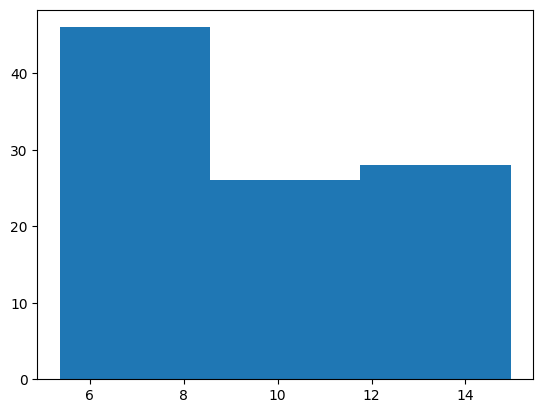

In [48]:
plt.hist(data_0,bins=3)

(array([  6.,  24.,  60., 132., 229., 229., 184.,  91.,  33.,  12.]),
 array([ 2.25227127,  3.7146071 ,  5.17694293,  6.63927876,  8.10161459,
         9.56395042, 11.02628625, 12.48862208, 13.9509579 , 15.41329373,
        16.87562956]),
 <BarContainer object of 10 artists>)

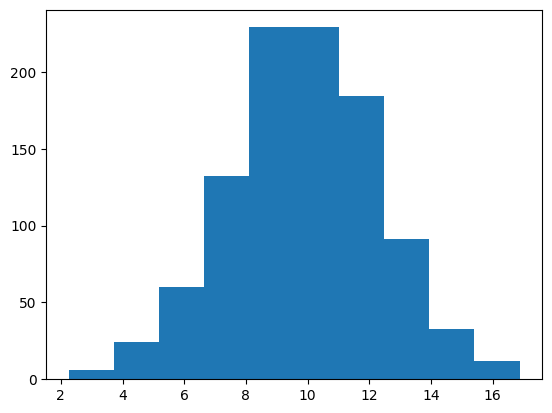

In [49]:
plt.hist(data_1)

In [50]:
np.mean(data_1)

9.87288397940762

In [51]:
np.std(data_1)

2.405691017902399

## Histogram

In Lab 3 you are asked to write a histogram function:

* User inputs a list of values `x` and optionally `n_bins` which defaults to 10.
* If not supplied, find the minimum and maximum (`x_min`,`x_max`) of the values in x.
* Determine the bin size (`bin_size`) by dividing the range of the function by the number of bins.
* Create an empty list of zeros of size `n_bins`, call it `hist`.
* Loop over the values in `x`
    * Loop over the values in `hist` with index `i`:
        * If x is between `x_min+i*bin_size` and `x_min+(i+1)*bin_size`, increment `hist[i].` 
        * For efficiency, try to use continue to goto the next bin and data point.
* Return `hist` and the list corresponding of the bin edges (i.e. of `x_min+i*bin_size`).    





## Alternative
* User inputs a list of values `x` and optionally `n_bins` which defaults to 10.
* If not supplied, find the minimum and maximum (`x_min`,`x_max`) of the values in x.
* Create an empty list of zeros of size `n_bins`, call it `hist`.
* Create a list of `bin_edges` using `arange`.
* Append the `x_max` to bin_edges.
* Loop over the values in `x`
    * Loop over the values in `hist` with index `i`:
        * If x is between `bin_edge[i]` and `bin_edge[i+1]`, increment `hist[i].` 
        * For efficiency, try to use continue to goto the next bin and data point.
* Return `hist` and the list corresponding of the bin edges (i.e. of `x_min+i*bin_size`).    



In [53]:
def histogram(data, n_bins=10,x_min=None, x_max=None):
    if x_min==None:
        x_min=min(data)
    if x_max==None:
        x_max=max(data)
        
    bin_edges = linspace(x_min,x_max,n_bins)
    bin_edges.append(x_max)

    hist=[0]*n_bins
    
    for d in data:
        for i,(low_edge,high_edge) in enumerate(zip(bin_edges[:-1],bin_edges[1:])):
            if d>=low_edge and d<high_edge:
                hist[i]+=1
                break
                
    return hist,bin_edges

In [54]:
histogram(data_0,10,0,10)

([0, 0, 0, 0, 0, 8, 15, 15, 12, 9],
 [0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10])

In [55]:
np.histogram(data_0,range=(0,10),bins=10)

(array([ 0,  0,  0,  0,  0,  8, 15, 15, 12,  9]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]))

## Accept/Reject

Inputs: 

* function `f`
* number of points to generate `n`
* range to generate within `x_min`, `x_max`
* optional `n_steps`, defaulting to 100, used for finding min/max.
 
Strategy:

1. Find `y_min` and `y_max` of function `f` over input range.
    1. Create/use new function `find_min_max` analgous to `find_min` above. 
1. Create output list to hold values.
1. Use `while` statement to loop until length of output list is `n`.
    1. Draw 2 random numbers from uniform distribution:
        1. `x` in range [`x_min`,`x_max`] 
        1. `y` in range [`y_min`,`y_max`] 
    1. if `y` < `f(x)`, append `x` to output list.
1. Return output list.


### Computing Integral

The integral should be `(x_max - x_min)*(y_max - y_min)` times the fraction of times that `y` < `f(x)`.